In [2]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [3]:
forest = pd.read_csv('turkey fire.csv')

forest.head()

C:\python\python382\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.8527,35.3594,306.0,2.1,1.4,2000-11-01,815,Terra,MODIS,60,6.03,294.4,13.2,D,0.0
1,40.5441,35.1786,307.8,1.1,1.0,2000-11-02,857,Terra,MODIS,66,6.03,296.0,5.8,D,0.0
2,40.1473,35.0444,305.3,1.1,1.0,2000-11-02,857,Terra,MODIS,46,6.03,293.5,4.3,D,0.0
3,40.5421,35.1909,310.0,1.1,1.0,2000-11-02,857,Terra,MODIS,69,6.03,296.1,7.3,D,0.0
4,41.2569,31.4172,307.9,1.1,1.0,2000-11-02,857,Terra,MODIS,0,6.03,290.4,8.0,D,2.0


In [4]:
forest.shape

(211309, 15)

In [5]:
forest.isnull().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          5391
dtype: int64

In [6]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type
count,211309.000000,211309.000000,211309.000000,211309.000000,211309.000000,211309.000000,211309.000000,211309.000000,211309.000000,205918.000000
mean,38.096869,35.810523,323.103487,1.519333,1.183241,1127.559252,66.453923,302.475387,30.341675,0.138798
std,1.259144,4.218867,15.710290,0.735847,0.228731,426.703297,19.297827,10.168149,67.171226,0.509481
min,35.822100,25.723600,300.000000,1.000000,1.000000,0.000000,0.000000,265.200000,0.000000,0.000000
25%,37.113200,33.037500,311.300000,1.000000,1.000000,845.000000,55.000000,294.100000,8.900000,0.000000
50%,37.711700,35.817400,322.100000,1.200000,1.100000,1024.000000,68.000000,302.800000,15.300000,0.000000
75%,38.931600,39.755500,331.300000,1.700000,1.300000,1110.000000,79.000000,310.000000,30.700000,0.000000
max,42.033000,44.796700,503.530000,4.820000,2.000000,2359.000000,100.000000,400.100000,4816.680000,3.000000


<AxesSubplot:>

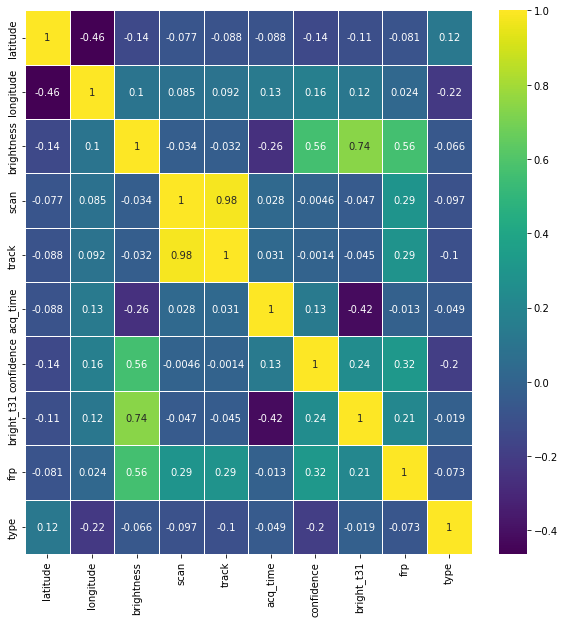

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [8]:
forest = forest.drop(['track'], axis = 1)

In [9]:

print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.00    54586
1.10    37680
1.20    21611
1.30    14000
1.40    11215
        ...  
2.14        1
3.97        1
3.41        1
3.02        1
1.52        1
Name: scan, Length: 248, dtype: int64

The aqc_time column
1048    3572
839     3460
1042    3317
845     3234
857     3194
        ... 
1210       1
43         1
759        1
2102       1
1216       1
Name: acq_time, Length: 577, dtype: int64

The satellite column
Terra    113554
Aqua      97755
Name: satellite, dtype: int64

The instrument column
MODIS    211309
Name: instrument, dtype: int64

The version column
6.03      196608
6.03        9310
6.1NRT      5391
Name: version, dtype: int64

The daynight column
D    173530
N     37779
Name: daynight, dtype: int64



In [10]:
forest = forest.drop(['instrument', 'version'], axis = 1)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,36.8527,35.3594,306.0,2.1,2000-11-01,815,Terra,60,294.4,13.2,D,0.0
1,40.5441,35.1786,307.8,1.1,2000-11-02,857,Terra,66,296.0,5.8,D,0.0
2,40.1473,35.0444,305.3,1.1,2000-11-02,857,Terra,46,293.5,4.3,D,0.0
3,40.5421,35.1909,310.0,1.1,2000-11-02,857,Terra,69,296.1,7.3,D,0.0
4,41.2569,31.4172,307.9,1.1,2000-11-02,857,Terra,0,290.4,8.0,D,2.0


In [11]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,36.8527,35.3594,306.0,2.1,2000-11-01,815,1,60,294.4,13.2,1,0.0
1,40.5441,35.1786,307.8,1.1,2000-11-02,857,1,66,296.0,5.8,1,0.0
2,40.1473,35.0444,305.3,1.1,2000-11-02,857,1,46,293.5,4.3,1,0.0
3,40.5421,35.1909,310.0,1.1,2000-11-02,857,1,69,296.1,7.3,1,0.0
4,41.2569,31.4172,307.9,1.1,2000-11-02,857,1,0,290.4,8.0,1,2.0


In [12]:

forest['type'].value_counts()

0.0    191670
2.0     14163
3.0        85
Name: type, dtype: int64

In [13]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0.0,2.0,3.0
0,36.8527,35.3594,306.0,2.1,2000-11-01,815,1,60,294.4,13.2,1,1,0,0
1,40.5441,35.1786,307.8,1.1,2000-11-02,857,1,66,296.0,5.8,1,1,0,0
2,40.1473,35.0444,305.3,1.1,2000-11-02,857,1,46,293.5,4.3,1,1,0,0
3,40.5421,35.1909,310.0,1.1,2000-11-02,857,1,69,296.1,7.3,1,1,0,0
4,41.2569,31.4172,307.9,1.1,2000-11-02,857,1,0,290.4,8.0,1,0,1,0


In [14]:


forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [15]:


bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,36.8527,35.3594,306.0,2.1,2000-11-01,815,1,60,294.4,13.2,1,1,0,0,3
1,40.5441,35.1786,307.8,1.1,2000-11-02,857,1,66,296.0,5.8,1,1,0,0,2
2,40.1473,35.0444,305.3,1.1,2000-11-02,857,1,46,293.5,4.3,1,1,0,0,2
3,40.5421,35.1909,310.0,1.1,2000-11-02,857,1,69,296.1,7.3,1,1,0,0,2
4,41.2569,31.4172,307.9,1.1,2000-11-02,857,1,0,290.4,8.0,1,0,1,0,2


In [16]:


forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [17]:


forest = forest.drop(['scan'], axis = 1)

In [18]:
forest['year'] = forest['acq_date'].dt.year

forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,36.8527,35.3594,306.0,2000-11-01,815,1,60,294.4,13.2,1,1,0,0,3,2000
1,40.5441,35.1786,307.8,2000-11-02,857,1,66,296.0,5.8,1,1,0,0,2,2000
2,40.1473,35.0444,305.3,2000-11-02,857,1,46,293.5,4.3,1,1,0,0,2,2000
3,40.5421,35.1909,310.0,2000-11-02,857,1,69,296.1,7.3,1,1,0,0,2,2000
4,41.2569,31.4172,307.9,2000-11-02,857,1,0,290.4,8.0,1,0,1,0,2,2000


In [19]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [20]:
forest.shape

(211309, 17)

In [21]:


y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<AxesSubplot:>

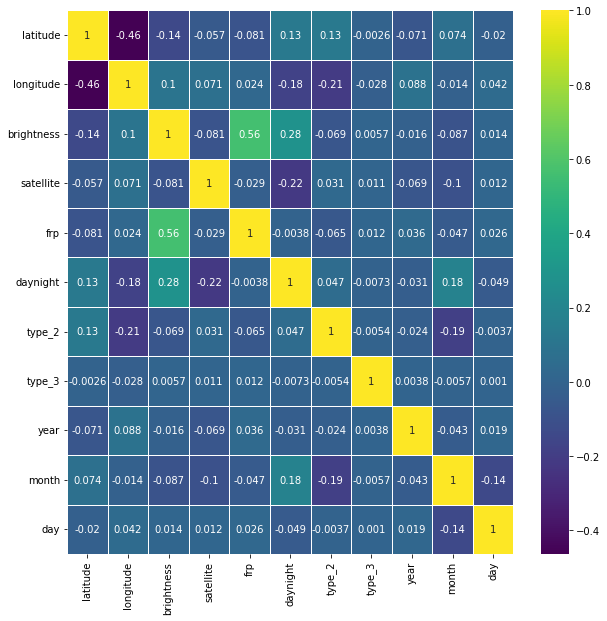

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [23]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,36.8527,35.3594,306.0,1,13.2,1,0,0,3,2000,11,1
1,40.5441,35.1786,307.8,1,5.8,1,0,0,2,2000,11,2
2,40.1473,35.0444,305.3,1,4.3,1,0,0,2,2000,11,2
3,40.5421,35.1909,310.0,1,7.3,1,0,0,2,2000,11,2
4,41.2569,31.4172,307.9,1,8.0,1,1,0,2,2000,11,2


In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [25]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [26]:

random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)


random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

96.37 %


In [27]:
#C
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

73.18 %


In [1]:

import pickle 

saved_model = pickle.dump(random_model, open('C:\Users\saad\Documents\fire\ForestModel.picklee','wb'))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_15468/907200093.py, line 3)

In [32]:
# The accuracy is not so great, plus the model is overfitting
# So we use RandomCV

In [34]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:


from sklearn.model_selection import RandomizedSearchCV

In [36]:

n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)

min_samples_split = [2, 3, 5]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [37]:

rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)

rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time= 1.1min
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time= 1.1min
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time= 1.2min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time= 1.4min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time= 1.5min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time= 1.5min
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  44.7s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=394; total time=  33.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  37.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  36.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  31.5s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=  32.0s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=  29.5s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=  29.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=478; total time= 1.3min
[CV] END max_depth=28, max_features=auto

[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=394; total time=  23.9s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  56.1s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  51.2s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  53.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=  20.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=  21.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=  24.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time= 1.0min
[CV] END max_depth=None, max_features=

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 457,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35}

In [40]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [41]:

random_new.fit(Xtrain, ytrain)

y_pred1 = random_new.predict(Xtest)


random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.16 %


In [42]:

random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

74.5 %


### Issues With Saving The Model Seems To Be A Problem

In [44]:

saved_model = pickle.dump(random_new, open('C:\Users\saad\Documents\fire\ForestModel.pickle','wb'))
  


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_14144/186126039.py, line 2)

In [45]:
pip install bz2file

Using legacy 'setup.py install' for bz2file, since package 'wheel' is not installed.
    Running setup.py install for bz2file: started
    Running setup.py install for bz2file: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# So I installed bz2file, which is used to compress data. This is a life saving package fpor those who have low spaces on
# their disk but want to store or use large datasets. Now the pickled file was over 700 mb in size which when used bz2
# compressed in into a file of size 93 mb.

In [47]:
import bz2

compressionLevel = 9
source_file = 'C:\Users\saad\Documents\fire\ForestModel.pickle' 
destination_file = 'drive/MyDrive/Dataset/Models/ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_14144/4145822860.py, line 4)